In [2]:
%%capture

import orca
import warnings; warnings.filterwarnings("ignore")

from bayarea import datasources
from bayarea import variables
from bayarea import models

#orca.run(['build_networks'])

%matplotlib inline

## List available tables

In [3]:
orca.list_tables()

['parcels',
 'buildings',
 'building_types',
 'jobs',
 'establishments',
 'households',
 'persons',
 'craigslist',
 'units',
 'nodessmall',
 'edgessmall',
 'nodeswalk',
 'edgeswalk',
 'nodesbeam',
 'edgesbeam']

## Get tables

In [3]:
parcels = orca.get_table('parcels')
households = orca.get_table('households')

In [5]:
parcels.zone_id.head()

parcel_id
229116      725
244166      715
202378      820
2004420    1401
340332      763
Name: zone_id, dtype: int64

In [7]:
parcels.local.head()

,development_type_id,land_value,acres,county_id,zone_id,proportion_undevelopable,tax_exempt_status,apn,parcel_id_local,geom_id,imputation_flag,x,y,shape_area,block_id,node_id
parcel_id,,,,,,,,,,,,,,,,
229116,1,0.0,3.360520,1,725,0.0,0,099 029001700,,10305106092872,_,-121.795620,37.655379,1.359956e+04,060014511022061,53091636
244166,1,0.0,1.294423,1,715,0.0,0,099B540210200,,11107351665227,_,-121.713004,37.717277,5.238348e+03,060014511011025,53059159
202378,25,6036500.0,14.993605,1,820,0.0,1,085A643106000,,11030175960628,merged,-122.014199,37.655260,6.067702e+04,060014351031029,1852532916
2004420,-1,179954.0,316.247146,97,1401,0.0,0,141-100-012,,6381677629073,"_, nr_zone_yrblt, bsqft_from_nrsqft, stories1",-122.771868,38.727893,1.279808e+06,060971541003180,304716887
340332,2,0.0,0.621275,1,763,0.0,0,525 166004800,,314875459798,_,-121.974508,37.546277,2.514215e+03,060014419272014,2397935818


In [8]:
type(households)

orca.orca.DataFrameWrapper

In [9]:
households.income.head()

household_id
0    85000.0
1    27000.0
2     6000.0
3    28000.0
4    10000.0
Name: income, dtype: float64

In [10]:
households.columns

['serialno',
 'persons',
 'building_type',
 'cars',
 'income',
 'race_of_head',
 'hispanic_head',
 'age_of_head',
 'workers',
 'state',
 'county',
 'tract',
 'block_group',
 'children',
 'tenure',
 'recent_mover',
 'block_group_id',
 'single_family',
 'unit_id',
 'building_id']

In [11]:
print(len(parcels.columns))

18


In [12]:
children_vars = [col for col in orca.get_table('parcels').columns if 'children' in col]
print(children_vars)

[]


In [13]:
orca.get_table('parcels').mean_children_ave_400_flat.tail()

KeyError: 'mean_children_ave_400_flat'

In [14]:
zones = orca.get_table('zones').to_frame()
print(zones.shape)
zones

KeyError: 'table not found: zones'

In [15]:
zones.describe()

,sum_residential_units_1110,sum_residential_units_1121,sum_residential_units_1122,sum_residential_units_1130,sum_residential_units_1210,sum_residential_units_1220,sum_residential_units_2111,sum_residential_units_2112,sum_residential_units_2121,sum_residential_units_2122,...,sum_persons_10_am_peak_travel_time,sum_persons_10_md_offpeak_travel_time,total_jobs_15_am_peak_travel_time,total_jobs_15_md_offpeak_travel_time,sum_persons_15_am_peak_travel_time,sum_persons_15_md_offpeak_travel_time,total_jobs_25_am_peak_travel_time,total_jobs_25_md_offpeak_travel_time,sum_persons_25_am_peak_travel_time,sum_persons_25_md_offpeak_travel_time
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.0,639.0,639.0,639.0,...,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,102.428844,0.852895,12.517997,96.013342,3.916760,38.776799,0.0,0.0,0.0,0.0,...,71369.323944,73192.442879,83322.098592,86442.111111,134934.464789,138490.507042,106096.164319,106307.165884,192335.251956,193126.220657
std,124.717652,4.681413,25.391096,813.509790,13.732248,113.596380,0.0,0.0,0.0,0.0,...,30260.913246,29676.021976,23060.958691,20652.844337,40810.457765,38239.234921,2806.521445,2062.314521,9450.932462,7479.235075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1958.000000,2198.000000,3516.000000,4038.000000,20429.000000,21570.000000,69743.000000,77079.000000,92472.000000,102156.000000
25%,2.002627,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,47689.000000,49656.500000,72131.000000,77016.500000,105631.000000,112378.000000,106575.000000,106585.000000,194067.000000,194140.000000
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,72874.000000,75903.000000,89646.000000,92636.000000,138947.000000,145574.000000,106613.000000,106641.000000,194509.000000,194883.000000
75%,173.507978,0.000000,15.500000,9.000000,0.000000,11.000000,0.0,0.0,0.0,0.0,...,91777.000000,94356.000000,102177.500000,102766.000000,170741.000000,170750.500000,106648.000000,106648.000000,195100.000000,195100.000000
max,746.011955,68.000000,256.000000,18792.000000,125.000000,1550.000000,0.0,0.0,0.0,0.0,...,140923.000000,140464.000000,106549.000000,106506.000000,193399.000000,193209.000000,106648.000000,106648.000000,195100.000000,195100.000000


## Defining computed variables/indicators

In [16]:
@orca.column('zone_districts')
def total_population(households):
    return households.persons.groupby(households.zone_district_id).sum()

@orca.column('zone_districts')
def mean_income(households):
    return households.income.groupby(households.zone_district_id).mean()

In [17]:
orca.get_table('zone_districts').total_population

Disaggregating zone_district_id to households from parcels


right
1     20699
2     24991
3     15323
4     22796
5     28633
6     27340
7     12660
8     10987
9     29981
10     1690
Name: persons, dtype: int64

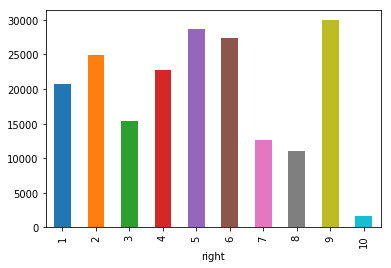

In [18]:
orca.get_table('zone_districts').total_population.plot(kind='bar')

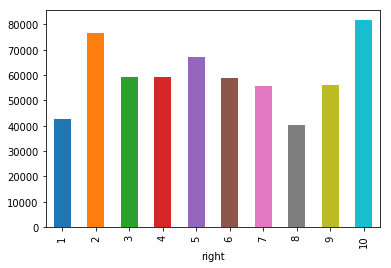

In [19]:
orca.get_table('zone_districts').mean_income.plot(kind='bar')

In [20]:
@orca.column('zones')
def median_household_size(households):
    return households.persons.groupby(households.zone_id).median()

In [21]:
@orca.column('zones')
def mean_household_size_carowners(households):
    households = households.to_frame()
    households = households[households.cars > 0]
    return households.persons.groupby(households.zone_id).mean()

In [15]:
len(orca.get_table('jobs'))

2578046

In [23]:
orca.get_table('zones').mean_household_size_carowners

Disaggregating proportion_undevelopable to households from parcels
Disaggregating land_value to households from parcels
Disaggregating acres to households from parcels
Disaggregating zoning_id to households from parcels
Disaggregating city to households from parcels
Disaggregating plan_id to households from parcels
Disaggregating zone_subdistrict_id to households from parcels
Disaggregating location_id to households from parcels
Disaggregating city_1 to households from parcels
Disaggregating block_id to households from parcels
Disaggregating block_group_id to households from parcels
Disaggregating x to households from parcels
Disaggregating y to households from parcels
Disaggregating sum_residential_units_1110 to households from parcels
Disaggregating sum_residential_units_1121 to households from parcels
Disaggregating sum_residential_units_1122 to households from parcels
Disaggregating sum_residential_units_1130 to households from parcels
Disaggregating sum_residential_units_1210 to h

zone_id
25     1.869565
26     2.114286
27     2.400000
28     2.000000
29     1.000000
30     1.875000
32     2.000000
33     2.952381
34     2.225352
38     2.200000
39     2.250000
40     2.000000
41     3.666667
42     2.090909
43     3.166667
44     2.100000
45     2.750000
46     2.235577
47     2.129676
48     1.000000
49     2.491194
50     2.120253
51     1.857143
52     2.500000
53     2.057143
54     2.355932
55     2.260870
56     2.052632
57     2.000000
58     2.000000
         ...   
632    3.000000
633    2.914286
634    2.833333
635    2.268293
636    2.757576
637    2.457627
638    2.691824
639    2.142857
640    2.183099
641    2.102041
642    2.075676
643    2.411765
644    2.089888
647    2.000000
648    1.346154
649    2.646707
650    1.833333
651    1.910506
652    1.744076
653    2.236842
654    1.797101
655    2.106557
656    2.313433
657    1.781955
658    2.000000
662    2.049451
663    2.041916
664    1.600000
665    2.180077
666    1.750000
Name: persons, L

In [24]:
orca.get_table('zones').median_household_size

right
25     2.0
26     2.0
27     2.0
28     2.0
29     1.0
30     2.0
32     2.0
33     2.0
34     2.0
38     2.0
39     2.0
40     2.0
41     4.0
42     2.0
43     3.0
44     2.0
45     2.0
46     2.0
47     2.0
48     1.0
49     2.0
50     2.0
51     2.0
52     2.0
53     2.0
54     2.0
55     2.0
56     2.0
57     2.0
58     2.0
      ... 
632    3.0
633    2.0
634    3.0
635    2.0
636    2.0
637    2.0
638    2.0
639    2.0
640    2.0
641    2.0
642    2.0
643    2.0
644    2.0
647    1.5
648    1.0
649    2.0
650    1.0
651    2.0
652    2.0
653    2.0
654    1.5
655    2.0
656    2.0
657    1.0
658    1.0
662    2.0
663    2.0
664    1.0
665    2.0
666    1.0
Name: persons, Length: 531, dtype: float64